In [1]:
#import libraries
import re
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import string
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import warnings 
warnings.filterwarnings("ignore", category=DeprecationWarning)
%matplotlib inline
import tweepy
from textblob import TextBlob
from wordcloud import WordCloud
plt.style.use('fivethirtyeight')

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
#load files:-
train  = pd.read_csv('https://raw.githubusercontent.com/TracyRenee61/Identify-the-Sentiment/master/train_2kmZucJ.csv')
test = pd.read_csv('https://raw.githubusercontent.com/TracyRenee61/Identify-the-Sentiment/master/test_oJQbWVk.csv')
sample_sub=pd.read_csv('https://raw.githubusercontent.com/TracyRenee61/Identify-the-Sentiment/master/sample_submission_LnhVWA4.csv')

In [3]:
train

,id,label,tweet
0,1,0,#fingerprint #Pregnancy Test https://goo.gl/h1...
1,2,0,Finally a transparant silicon case ^^ Thanks t...
2,3,0,We love this! Would you go? #talk #makememorie...
3,4,0,I'm wired I know I'm George I was made that wa...
4,5,1,What amazing service! Apple won't even talk to...
...,...,...,...
7915,7916,0,Live out loud #lol #liveoutloud #selfie #smile...
7916,7917,0,We would like to wish you an amazing day! Make...
7917,7918,0,Helping my lovely 90 year old neighbor with he...
7918,7919,0,Finally got my #smart #pocket #wifi stay conne...


In [4]:
train.shape

(7920, 3)

In [5]:
train.info

<bound method DataFrame.info of         id  label                                              tweet
0        1      0  #fingerprint #Pregnancy Test https://goo.gl/h1...
1        2      0  Finally a transparant silicon case ^^ Thanks t...
2        3      0  We love this! Would you go? #talk #makememorie...
3        4      0  I'm wired I know I'm George I was made that wa...
4        5      1  What amazing service! Apple won't even talk to...
...    ...    ...                                                ...
7915  7916      0  Live out loud #lol #liveoutloud #selfie #smile...
7916  7917      0  We would like to wish you an amazing day! Make...
7917  7918      0  Helping my lovely 90 year old neighbor with he...
7918  7919      0  Finally got my #smart #pocket #wifi stay conne...
7919  7920      0  Apple Barcelona!!! #Apple #Store #BCN #Barcelo...

[7920 rows x 3 columns]>

In [6]:
train.describe()

,id,label
count,7920.000000,7920.000000
mean,3960.500000,0.255808
std,2286.451399,0.436342
min,1.000000,0.000000
25%,1980.750000,0.000000
50%,3960.500000,0.000000
75%,5940.250000,1.000000
max,7920.000000,1.000000


In [7]:
test

,id,tweet
0,7921,I hate the new #iphone upgrade. Won't let me d...
1,7922,currently shitting my fucking pants. #apple #i...
2,7923,"I'd like to puts some CD-ROMS on my iPad, is t..."
3,7924,My ipod is officially dead. I lost all my pict...
4,7925,Been fighting iTunes all night! I only want th...
...,...,...
1948,9869,"#SamsungGalaxyNote7 Explodes, Burns 6-Year-Old..."
1949,9870,Now Available - Hoodie. Check it out here - ht...
1950,9871,There goes a crack right across the screen. If...
1951,9872,@codeofinterest as i said #Adobe big time we m...


In [8]:
sample_sub

,id,label
0,7921,0
1,7922,0
2,7923,0
3,7924,0
4,7925,0
...,...,...
1948,9869,0
1949,9870,0
1950,9871,0
1951,9872,0


In [9]:
combi = train.append(test, ignore_index=True)

In [10]:
combi

,id,label,tweet
0,1,0.0,#fingerprint #Pregnancy Test https://goo.gl/h1...
1,2,0.0,Finally a transparant silicon case ^^ Thanks t...
2,3,0.0,We love this! Would you go? #talk #makememorie...
3,4,0.0,I'm wired I know I'm George I was made that wa...
4,5,1.0,What amazing service! Apple won't even talk to...
...,...,...,...
9868,9869,NaN,"#SamsungGalaxyNote7 Explodes, Burns 6-Year-Old..."
9869,9870,NaN,Now Available - Hoodie. Check it out here - ht...
9870,9871,NaN,There goes a crack right across the screen. If...
9871,9872,NaN,@codeofinterest as i said #Adobe big time we m...


In [11]:
combi.shape

(9873, 3)

In [12]:
combi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9873 entries, 0 to 9872
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   id      9873 non-null   int64  
 1   label   7920 non-null   float64
 2   tweet   9873 non-null   object 
dtypes: float64(1), int64(1), object(1)
memory usage: 231.5+ KB


In [13]:
combi.describe()

,id,label
count,9873.000000,7920.000000
mean,4937.000000,0.255808
std,2850.233938,0.436342
min,1.000000,0.000000
25%,2469.000000,0.000000
50%,4937.000000,0.000000
75%,7405.000000,1.000000
max,9873.000000,1.000000


In [14]:
# Importing HTMLParser
from html.parser import HTMLParser
html_parser = HTMLParser()

In [15]:
# Created a new columns i.e. clean_tweet contains the same tweets but cleaned version
combi['tidy_tweet'] = combi['tweet'].apply(lambda x: html_parser.unescape(x))
combi

,id,label,tweet,tidy_tweet
0,1,0.0,#fingerprint #Pregnancy Test https://goo.gl/h1...,#fingerprint #Pregnancy Test https://goo.gl/h1...
1,2,0.0,Finally a transparant silicon case ^^ Thanks t...,Finally a transparant silicon case ^^ Thanks t...
2,3,0.0,We love this! Would you go? #talk #makememorie...,We love this! Would you go? #talk #makememorie...
3,4,0.0,I'm wired I know I'm George I was made that wa...,I'm wired I know I'm George I was made that wa...
4,5,1.0,What amazing service! Apple won't even talk to...,What amazing service! Apple won't even talk to...
...,...,...,...,...
9868,9869,NaN,"#SamsungGalaxyNote7 Explodes, Burns 6-Year-Old...","#SamsungGalaxyNote7 Explodes, Burns 6-Year-Old..."
9869,9870,NaN,Now Available - Hoodie. Check it out here - ht...,Now Available - Hoodie. Check it out here - ht...
9870,9871,NaN,There goes a crack right across the screen. If...,There goes a crack right across the screen. If...
9871,9872,NaN,@codeofinterest as i said #Adobe big time we m...,@codeofinterest as i said #Adobe big time we m...


In [16]:
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for i in r:
        input_txt = re.sub(i, '', input_txt)
    return input_txt

In [17]:
# remove twitter handles (@user)
combi['tidy_tweet'] = np.vectorize(remove_pattern)(combi['tweet'], "@[\w]*")

In [18]:
# remove special characters, numbers, punctuations
combi['tidy_tweet'] = combi['tidy_tweet'].str.replace("[^a-zA-Z#]", " ")

In [19]:
combi['tidy_tweet'] = combi['tidy_tweet'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))

In [20]:
#changing all tweets into lower case
combi['tidy_tweet'] = combi['tidy_tweet'].apply(lambda x: x.lower())
combi

,id,label,tweet,tidy_tweet
0,1,0.0,#fingerprint #Pregnancy Test https://goo.gl/h1...,#fingerprint #pregnancy test https mfqv #andro...
1,2,0.0,Finally a transparant silicon case ^^ Thanks t...,finally transparant silicon case thanks uncle ...
2,3,0.0,We love this! Would you go? #talk #makememorie...,love this would #talk #makememories #unplug #r...
3,4,0.0,I'm wired I know I'm George I was made that wa...,wired know george made that #iphone #cute #dav...
4,5,1.0,What amazing service! Apple won't even talk to...,what amazing service apple even talk about que...
...,...,...,...,...
9868,9869,NaN,"#SamsungGalaxyNote7 Explodes, Burns 6-Year-Old...",#samsunggalaxynote explodes burns year thanks ...
9869,9870,NaN,Now Available - Hoodie. Check it out here - ht...,available hoodie check here http zetasupplies ...
9870,9871,NaN,There goes a crack right across the screen. If...,there goes crack right across screen could act...
9871,9872,NaN,@codeofinterest as i said #Adobe big time we m...,said #adobe time well include #apple


In [21]:
# Apostrophe Dictionary
apostrophe_dict = {
"ain't": "am not / are not",
"aren't": "are not / am not",
"can't": "cannot",
"can't've": "cannot have",
"'cause": "because",
"could've": "could have",
"couldn't": "could not",
"couldn't've": "could not have",
"didn't": "did not",
"doesn't": "does not",
"don't": "do not",
"hadn't": "had not",
"hadn't've": "had not have",
"hasn't": "has not",
"haven't": "have not",
"he'd": "he had / he would",
"he'd've": "he would have",
"he'll": "he shall / he will",
"he'll've": "he shall have / he will have",
"he's": "he has / he is",
"how'd": "how did",
"how'd'y": "how do you",
"how'll": "how will",
"how's": "how has / how is",
"i'd": "I had / I would",
"i'd've": "I would have",
"i'll": "I shall / I will",
"i'll've": "I shall have / I will have",
"i'm": "I am",
"i've": "I have",
"isn't": "is not",
"it'd": "it had / it would",
"it'd've": "it would have",
"it'll": "it shall / it will",
"it'll've": "it shall have / it will have",
"it's": "it has / it is",
"let's": "let us",
"ma'am": "madam",
"mayn't": "may not",
"might've": "might have",
"mightn't": "might not",
"mightn't've": "might not have",
"must've": "must have",
"mustn't": "must not",
"mustn't've": "must not have",
"needn't": "need not",
"needn't've": "need not have",
"o'clock": "of the clock",
"oughtn't": "ought not",
"oughtn't've": "ought not have",
"shan't": "shall not",
"sha'n't": "shall not",
"shan't've": "shall not have",
"she'd": "she had / she would",
"she'd've": "she would have",
"she'll": "she shall / she will",
"she'll've": "she shall have / she will have",
"she's": "she has / she is",
"should've": "should have",
"shouldn't": "should not",
"shouldn't've": "should not have",
"so've": "so have",
"so's": "so as / so is",
"that'd": "that would / that had",
"that'd've": "that would have",
"that's": "that has / that is",
"there'd": "there had / there would",
"there'd've": "there would have",
"there's": "there has / there is",
"they'd": "they had / they would",
"they'd've": "they would have",
"they'll": "they shall / they will",
"they'll've": "they shall have / they will have",
"they're": "they are",
"they've": "they have",
"to've": "to have",
"wasn't": "was not",
"we'd": "we had / we would",
"we'd've": "we would have",
"we'll": "we will",
"we'll've": "we will have",
"we're": "we are",
"we've": "we have",
"weren't": "were not",
"what'll": "what shall / what will",
"what'll've": "what shall have / what will have",
"what're": "what are",
"what's": "what has / what is",
"what've": "what have",
"when's": "when has / when is",
"when've": "when have",
"where'd": "where did",
"where's": "where has / where is",
"where've": "where have",
"who'll": "who shall / who will",
"who'll've": "who shall have / who will have",
"who's": "who has / who is",
"who've": "who have",
"why's": "why has / why is",
"why've": "why have",
"will've": "will have",
"won't": "will not",
"won't've": "will not have",
"would've": "would have",
"wouldn't": "would not",
"wouldn't've": "would not have",
"y'all": "you all",
"y'all'd": "you all would",
"y'all'd've": "you all would have",
"y'all're": "you all are",
"y'all've": "you all have",
"you'd": "you had / you would",
"you'd've": "you would have",
"you'll": "you shall / you will",
"you'll've": "you shall have / you will have",
"you're": "you are",
"you've": "you have"
}
apostrophe_dict

{"'cause": 'because',
 "ain't": 'am not / are not',
 "aren't": 'are not / am not',
 "can't": 'cannot',
 "can't've": 'cannot have',
 "could've": 'could have',
 "couldn't": 'could not',
 "couldn't've": 'could not have',
 "didn't": 'did not',
 "doesn't": 'does not',
 "don't": 'do not',
 "hadn't": 'had not',
 "hadn't've": 'had not have',
 "hasn't": 'has not',
 "haven't": 'have not',
 "he'd": 'he had / he would',
 "he'd've": 'he would have',
 "he'll": 'he shall / he will',
 "he'll've": 'he shall have / he will have',
 "he's": 'he has / he is',
 "how'd": 'how did',
 "how'd'y": 'how do you',
 "how'll": 'how will',
 "how's": 'how has / how is',
 "i'd": 'I had / I would',
 "i'd've": 'I would have',
 "i'll": 'I shall / I will',
 "i'll've": 'I shall have / I will have',
 "i'm": 'I am',
 "i've": 'I have',
 "isn't": 'is not',
 "it'd": 'it had / it would',
 "it'd've": 'it would have',
 "it'll": 'it shall / it will',
 "it'll've": 'it shall have / it will have',
 "it's": 'it has / it is',
 "let's": 'l

In [22]:
def lookup_dict(text, dictionary):
    for word in text.split():
        if word.lower() in dictionary:
            if word.lower() in text.split():
                text = text.replace(word, dictionary[word.lower()])
    return text

In [23]:
combi['tidy_tweet'] = combi['tidy_tweet'].apply(lambda x: lookup_dict(x,apostrophe_dict))
combi

,id,label,tweet,tidy_tweet
0,1,0.0,#fingerprint #Pregnancy Test https://goo.gl/h1...,#fingerprint #pregnancy test https mfqv #andro...
1,2,0.0,Finally a transparant silicon case ^^ Thanks t...,finally transparant silicon case thanks uncle ...
2,3,0.0,We love this! Would you go? #talk #makememorie...,love this would #talk #makememories #unplug #r...
3,4,0.0,I'm wired I know I'm George I was made that wa...,wired know george made that #iphone #cute #dav...
4,5,1.0,What amazing service! Apple won't even talk to...,what amazing service apple even talk about que...
...,...,...,...,...
9868,9869,NaN,"#SamsungGalaxyNote7 Explodes, Burns 6-Year-Old...",#samsunggalaxynote explodes burns year thanks ...
9869,9870,NaN,Now Available - Hoodie. Check it out here - ht...,available hoodie check here http zetasupplies ...
9870,9871,NaN,There goes a crack right across the screen. If...,there goes crack right across screen could act...
9871,9872,NaN,@codeofinterest as i said #Adobe big time we m...,said #adobe time well include #apple


In [24]:
short_word_dict = {
"121": "one to one",
"a/s/l": "age, sex, location",
"adn": "any day now",
"afaik": "as far as I know",
"afk": "away from keyboard",
"aight": "alright",
"alol": "actually laughing out loud",
"b4": "before",
"b4n": "bye for now",
"bak": "back at the keyboard",
"bf": "boyfriend",
"bff": "best friends forever",
"bfn": "bye for now",
"bg": "big grin",
"bta": "but then again",
"btw": "by the way",
"cid": "crying in disgrace",
"cnp": "continued in my next post",
"cp": "chat post",
"cu": "see you",
"cul": "see you later",
"cul8r": "see you later",
"cya": "bye",
"cyo": "see you online",
"dbau": "doing business as usual",
"fud": "fear, uncertainty, and doubt",
"fwiw": "for what it's worth",
"fyi": "for your information",
"g": "grin",
"g2g": "got to go",
"ga": "go ahead",
"gal": "get a life",
"gf": "girlfriend",
"gfn": "gone for now",
"gmbo": "giggling my butt off",
"gmta": "great minds think alike",
"h8": "hate",
"hagn": "have a good night",
"hdop": "help delete online predators",
"hhis": "hanging head in shame",
"iac": "in any case",
"ianal": "I am not a lawyer",
"ic": "I see",
"idk": "I don't know",
"imao": "in my arrogant opinion",
"imnsho": "in my not so humble opinion",
"imo": "in my opinion",
"iow": "in other words",
"ipn": "I’m posting naked",
"irl": "in real life",
"jk": "just kidding",
"l8r": "later",
"ld": "later, dude",
"ldr": "long distance relationship",
"llta": "lots and lots of thunderous applause",
"lmao": "laugh my ass off",
"lmirl": "let's meet in real life",
"lol": "laugh out loud",
"ltr": "longterm relationship",
"lulab": "love you like a brother",
"lulas": "love you like a sister",
"luv": "love",
"m/f": "male or female",
"m8": "mate",
"milf": "mother I would like to fuck",
"oll": "online love",
"omg": "oh my god",
"otoh": "on the other hand",
"pir": "parent in room",
"ppl": "people",
"r": "are",
"rofl": "roll on the floor laughing",
"rpg": "role playing games",
"ru": "are you",
"shid": "slaps head in disgust",
"somy": "sick of me yet",
"sot": "short of time",
"thanx": "thanks",
"thx": "thanks",
"ttyl": "talk to you later",
"u": "you",
"ur": "you are",
"uw": "you’re welcome",
"wb": "welcome back",
"wfm": "works for me",
"wibni": "wouldn't it be nice if",
"wtf": "what the fuck",
"wtg": "way to go",
"wtgp": "want to go private",
"ym": "young man",
"gr8": "great"
}

In [25]:
combi['tidy_tweet'] = combi['tidy_tweet'].apply(lambda x: lookup_dict(x,short_word_dict))
combi

,id,label,tweet,tidy_tweet
0,1,0.0,#fingerprint #Pregnancy Test https://goo.gl/h1...,#fingerprint #pregnancy test https mfqv #andro...
1,2,0.0,Finally a transparant silicon case ^^ Thanks t...,finally transparant silicon case thanks uncle ...
2,3,0.0,We love this! Would you go? #talk #makememorie...,love this would #talk #makememories #unplug #r...
3,4,0.0,I'm wired I know I'm George I was made that wa...,wired know george made that #iphone #cute #dav...
4,5,1.0,What amazing service! Apple won't even talk to...,what amazing service apple even talk about que...
...,...,...,...,...
9868,9869,NaN,"#SamsungGalaxyNote7 Explodes, Burns 6-Year-Old...",#samsunggalaxynote explodes burns year thanks ...
9869,9870,NaN,Now Available - Hoodie. Check it out here - ht...,available hoodie check here http zetasupplies ...
9870,9871,NaN,There goes a crack right across the screen. If...,there goes crack right across screen could act...
9871,9872,NaN,@codeofinterest as i said #Adobe big time we m...,said #adobe time well include #apple


In [26]:
emoticon_dict = {
":)": "happy",
":‑)": "happy",
":-]": "happy",
":-3": "happy",
":->": "happy",
"8-)": "happy",
":-}": "happy",
":o)": "happy",
":c)": "happy",
":^)": "happy",
"=]": "happy",
"=)": "happy",
"<3": "happy",
":-(": "sad",
":(": "sad",
":c": "sad",
":<": "sad",
":[": "sad",
">:[": "sad",
":{": "sad",
">:(": "sad",
":-c": "sad",
":-< ": "sad",
":-[": "sad",
":-||": "sad"
}
emoticon_dict

{'8-)': 'happy',
 ':(': 'sad',
 ':)': 'happy',
 ':-(': 'sad',
 ':-3': 'happy',
 ':-< ': 'sad',
 ':->': 'happy',
 ':-[': 'sad',
 ':-]': 'happy',
 ':-c': 'sad',
 ':-||': 'sad',
 ':-}': 'happy',
 ':<': 'sad',
 ':[': 'sad',
 ':^)': 'happy',
 ':c': 'sad',
 ':c)': 'happy',
 ':o)': 'happy',
 ':{': 'sad',
 ':‑)': 'happy',
 '<3': 'happy',
 '=)': 'happy',
 '=]': 'happy',
 '>:(': 'sad',
 '>:[': 'sad'}

In [27]:
combi['tidy_tweet'] = combi['tidy_tweet'].apply(lambda x: lookup_dict(x,emoticon_dict))
combi

,id,label,tweet,tidy_tweet
0,1,0.0,#fingerprint #Pregnancy Test https://goo.gl/h1...,#fingerprint #pregnancy test https mfqv #andro...
1,2,0.0,Finally a transparant silicon case ^^ Thanks t...,finally transparant silicon case thanks uncle ...
2,3,0.0,We love this! Would you go? #talk #makememorie...,love this would #talk #makememories #unplug #r...
3,4,0.0,I'm wired I know I'm George I was made that wa...,wired know george made that #iphone #cute #dav...
4,5,1.0,What amazing service! Apple won't even talk to...,what amazing service apple even talk about que...
...,...,...,...,...
9868,9869,NaN,"#SamsungGalaxyNote7 Explodes, Burns 6-Year-Old...",#samsunggalaxynote explodes burns year thanks ...
9869,9870,NaN,Now Available - Hoodie. Check it out here - ht...,available hoodie check here http zetasupplies ...
9870,9871,NaN,There goes a crack right across the screen. If...,there goes crack right across screen could act...
9871,9872,NaN,@codeofinterest as i said #Adobe big time we m...,said #adobe time well include #apple


In [28]:
#remove words with length of 3 or less
combi['tidy_tweet'] = combi['tidy_tweet'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))
combi['tidy_tweet']


0       #fingerprint #pregnancy test https mfqv #andro...
1       finally transparant silicon case thanks uncle ...
2       love this would #talk #makememories #unplug #r...
3       wired know george made that #iphone #cute #dav...
4       what amazing service apple even talk about que...
                              ...                        
9868    #samsunggalaxynote explodes burns year thanks ...
9869    available hoodie check here http zetasupplies ...
9870    there goes crack right across screen could act...
9871                 said #adobe time well include #apple
9872    finally thanks father #samsung #galaxy #gift #...
Name: tidy_tweet, Length: 9873, dtype: object

In [29]:
#spelling correction with text blob library
#combi['tidy_tweet'] = combi['tidy_tweet'].apply(lambda x: str(TextBlob(x).correct()))
#combi

In [30]:
tokenized_tweet = combi['tidy_tweet'].apply(lambda x: x.split())
tokenized_tweet

0       [#fingerprint, #pregnancy, test, https, mfqv, ...
1       [finally, transparant, silicon, case, thanks, ...
2       [love, this, would, #talk, #makememories, #unp...
3       [wired, know, george, made, that, #iphone, #cu...
4       [what, amazing, service, apple, even, talk, ab...
                              ...                        
9868    [#samsunggalaxynote, explodes, burns, year, th...
9869    [available, hoodie, check, here, http, zetasup...
9870    [there, goes, crack, right, across, screen, co...
9871          [said, #adobe, time, well, include, #apple]
9872    [finally, thanks, father, #samsung, #galaxy, #...
Name: tidy_tweet, Length: 9873, dtype: object

In [31]:
from nltk.stem.porter import *
stemmer = PorterStemmer()
tokenized_tweet = tokenized_tweet.apply(lambda x: [stemmer.stem(i) for i in x]) # stemming
tokenized_tweet

0       [#fingerprint, #pregnanc, test, http, mfqv, #a...
1       [final, transpar, silicon, case, thank, uncl, ...
2       [love, thi, would, #talk, #makememori, #unplug...
3       [wire, know, georg, made, that, #iphon, #cute,...
4       [what, amaz, servic, appl, even, talk, about, ...
                              ...                        
9868    [#samsunggalaxynot, explod, burn, year, thank,...
9869    [avail, hoodi, check, here, http, zetasuppli, ...
9870    [there, goe, crack, right, across, screen, cou...
9871             [said, #adob, time, well, includ, #appl]
9872    [final, thank, father, #samsung, #galaxi, #gif...
Name: tidy_tweet, Length: 9873, dtype: object

In [32]:
for i in range(len(tokenized_tweet)):
    tokenized_tweet[i] = ' '.join(tokenized_tweet[i])
combi['tidy_tweet'] = tokenized_tweet

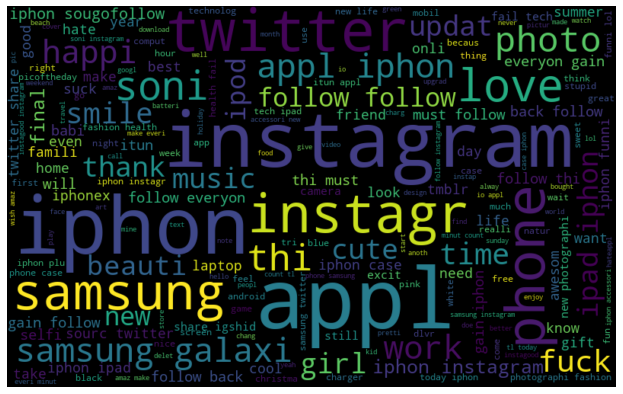

In [33]:
all_words = ' '.join([text for text in combi['tidy_tweet']])
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [ ]:
normal_words =' '.join([text for text in combi['tidy_tweet'][combi['label'] == 0]])
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(normal_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [ ]:
negative_words = ' '.join([text for text in combi['tidy_tweet'][combi['label'] == 1]])
wordcloud = WordCloud(width=800, height=500,
random_state=21, max_font_size=110).generate(negative_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [ ]:
# function to collect hashtags
def hashtag_extract(x):
    hashtags = []
    # Loop over the words in the tweet
    for i in x:
        ht = re.findall(r"#(\w+)", i)
        hashtags.append(ht)
    return hashtags

In [ ]:
# extracting hashtags from normal tweets
HT_regular = hashtag_extract(combi['tidy_tweet'][combi['label'] == 0])
# extracting hashtags from negative tweets
HT_negative = hashtag_extract(combi['tidy_tweet'][combi['label'] == 1])
# unnesting list
HT_regular = sum(HT_regular,[])
HT_negative = sum(HT_negative,[])

In [ ]:
#positive tweets
a = nltk.FreqDist(HT_regular)
d = pd.DataFrame({'Hashtag': list(a.keys()),
                  'Count': list(a.values())})
# selecting top 10 most frequent hashtags     
d = d.nlargest(columns="Count", n = 10) 
plt.figure(figsize=(16,5))
ax = sns.barplot(data=d, x= "Hashtag", y = "Count")
ax.set(ylabel = 'Count')
plt.show()

In [ ]:
#negative tweets
b = nltk.FreqDist(HT_negative)
e = pd.DataFrame({'Hashtag': list(b.keys()), 'Count': list(b.values())})
# selecting top 10 most frequent hashtags
e = e.nlargest(columns="Count", n = 10)   
plt.figure(figsize=(16,5))
ax = sns.barplot(data=e, x= "Hashtag", y = "Count")
ax.set(ylabel = 'Count')
plt.show()

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
bow_vectorizer = CountVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')
# bag-of-words feature matrix
bow = bow_vectorizer.fit_transform(combi['tidy_tweet'])

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')
# TF-IDF feature matrix
tfidf = tfidf_vectorizer.fit_transform(combi['tidy_tweet'])

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
train_bow = bow[:7920,:]
test_bow = bow[7920:,:]
# splitting data into training and validation set
xtrain_bow, xvalid_bow, ytrain, yvalid = train_test_split(train_bow, train['label'], random_state=42, test_size=0.3)
#create logistic regression
lreg = LogisticRegression()
#create hyper parameters
penalty=['l1', 'l2']
C=np.logspace(0,4,10)
hyperparameters=dict(C=C, penalty=penalty)
#create grid search
clf=GridSearchCV(lreg, hyperparameters, cv=5, verbose=0)
#fit the model
best_model=clf.fit(xtrain_bow, ytrain) # training the model
#view best parameters
print('best penalty:', best_model.best_estimator_.get_params()['penalty'])
print('best C:', best_model.best_estimator_.get_params()['C'])

In [ ]:
best_model.predict(test_bow)
best_model

In [ ]:
prediction = clf.predict_proba(xvalid_bow) # predicting on the validation set
prediction_int = prediction[:,1] >= 0.3 # if prediction is greater than or equal to 0.3 than 1 else 0
prediction_int = prediction_int.astype(np.int)
f1_score(yvalid, prediction_int) # calculating f1 score

In [ ]:
test_pred = clf.predict_proba(test_bow)
test_pred_int = test_pred[:,1] >= 0.3
test_pred_int = test_pred_int.astype(np.int)
test['label'] = test_pred_int
submission = test[['id','label']]
submission.to_csv('sub_lreg_bow.csv', index=False) # writing data to a CSV file
submission

In [ ]:
train_tfidf = tfidf[:7920,:]
test_tfidf = tfidf[7920:,:]

xtrain_tfidf = train_tfidf[ytrain.index]
xvalid_tfidf = train_tfidf[yvalid.index]

lreg.fit(xtrain_tfidf, ytrain)

prediction = clf.predict_proba(xvalid_tfidf)
prediction_int = prediction[:,1] >= 0.3
prediction_int = prediction_int.astype(np.int)

f1_score(yvalid, prediction_int)